In [1]:
import gensim
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
df = pd.read_csv("20_newsgroup.csv")
df

,Unnamed: 0,text,target,title,date
0,0,I was wondering if anyone out there could enli...,7,rec.autos,2024-01-15 17:56:41.864727
1,17,I recently posted an article asking what kind ...,7,rec.autos,2024-01-15 17:56:41.864727
2,29,\nIt depends on your priorities. A lot of peo...,7,rec.autos,2024-01-15 17:56:41.864727
3,56,an excellent automatic can be found in the sub...,7,rec.autos,2024-01-15 17:56:41.864727
4,64,: Ford and his automobile. I need information...,7,rec.autos,2024-01-15 17:56:41.864727
...,...,...,...,...,...
11309,11210,Secrecy in Clipper Chip\n\nThe serial number o...,11,sci.crypt,2024-01-15 17:56:41.864727
11310,11217,Hi !\n\nI am interested in the source of FEAL ...,11,sci.crypt,2024-01-15 17:56:41.864727
11311,11243,"The actual algorithm is classified, however, t...",11,sci.crypt,2024-01-15 17:56:41.864727
11312,11254,\n\tThis appears to be generic calling upon th...,11,sci.crypt,2024-01-15 17:56:41.864727


In [3]:
df.shape

(11314, 5)

In [5]:
df = df.dropna(subset=['text'])
news_text = df.text.apply(gensim.utils.simple_preprocess)

In [6]:
#Training the Word2Vec Model
model = gensim.models.Word2Vec(
    window=5,
    min_count=2,
    workers=4,
)

In [7]:
#Build Vocabulary
model.build_vocab(news_text, progress_per=100)
dictionary = model.build_vocab(news_text, progress_per=100)

In [8]:
print(dictionary)

None


In [9]:
model.train(news_text, total_examples=model.corpus_count, epochs=model.epochs)

(7983646, 10286645)

In [10]:
model.wv.most_similar("good")

[('bad', 0.827640950679779),
 ('big', 0.7864809036254883),
 ('nice', 0.7614952325820923),
 ('great', 0.7183363437652588),
 ('real', 0.6879739165306091),
 ('decent', 0.6721333861351013),
 ('cheap', 0.6587445735931396),
 ('interesting', 0.6562740802764893),
 ('serious', 0.6510215401649475),
 ('just', 0.6497491598129272)]

In [11]:
news_category = df["title"]
news_category

0        rec.autos
1        rec.autos
2        rec.autos
3        rec.autos
4        rec.autos
           ...    
11309    sci.crypt
11310    sci.crypt
11311    sci.crypt
11312    sci.crypt
11313    sci.crypt
Name: title, Length: 11096, dtype: object

In [13]:
news_target = news_category.drop_duplicates(keep='first')

In [16]:
len(news_target)

20

In [17]:
text = df["text"]
text

0        I was wondering if anyone out there could enli...
1        I recently posted an article asking what kind ...
2        \nIt depends on your priorities.  A lot of peo...
3        an excellent automatic can be found in the sub...
4        : Ford and his automobile.  I need information...
                               ...                        
11309    Secrecy in Clipper Chip\n\nThe serial number o...
11310    Hi !\n\nI am interested in the source of FEAL ...
11311    The actual algorithm is classified, however, t...
11312    \n\tThis appears to be generic calling upon th...
11313    \nProbably keep quiet and take it, lest they g...
Name: text, Length: 11096, dtype: object

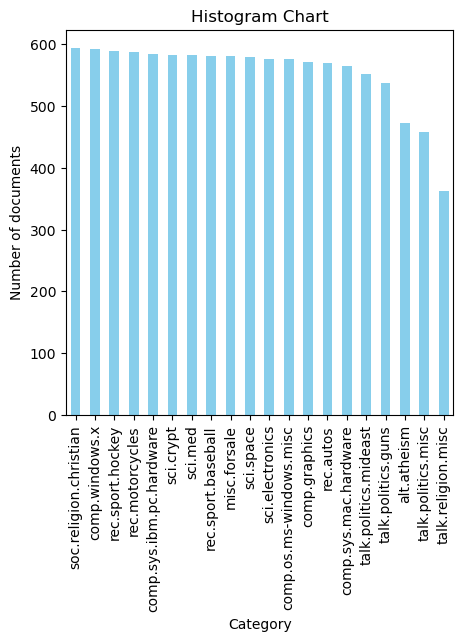

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Histogram for 'Category'
plt.figure(figsize=(5, 5))
df['title'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Histogram Chart')
plt.xlabel('Category')
plt.ylabel('Number of documents')
plt.show()

# Bag of Words model

Let's train a model using a simple count vectorizer. The bag-of-words model is a simplified representation of the raw data. In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words. Bag-of-words representations discard grammar, order, and structure in the text, but track occurances. To use this model, Sklearn offers a **CountVectorizer class** which returns a sparse matrix and basically does the same specified before, but which has some configurable options.

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Split the data into features (X) and target (y)
X = df['text']
y = df['title']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [23]:
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)


MultinomialNB()

In [24]:
# Lets use the stop_words argument to remove words like "and, the, a"

cvec = CountVectorizer(stop_words='english')

# Fit our vectorizer using our train data

cvec.fit(X)

# Transform training data

cvec_mat = cvec.transform(X)

# Let's check some of the words occuring


print()

In [25]:
predictions = model.predict(X_test_vectorized)


In [26]:
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))


Accuracy: 0.6792792792792792
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.75      0.44      0.56        88
           comp.graphics       0.54      0.73      0.62       117
 comp.os.ms-windows.misc       1.00      0.04      0.07       134
comp.sys.ibm.pc.hardware       0.52      0.71      0.60       122
   comp.sys.mac.hardware       0.85      0.58      0.69       103
          comp.windows.x       0.55      0.88      0.68       112
            misc.forsale       0.80      0.67      0.73       107
               rec.autos       0.85      0.65      0.74       126
         rec.motorcycles       0.90      0.66      0.76       123
      rec.sport.baseball       0.94      0.78      0.85       129
        rec.sport.hockey       0.74      0.85      0.79       103
               sci.crypt       0.61      0.85      0.71       126
         sci.electronics       0.73      0.50      0.60       117
                 sci.me

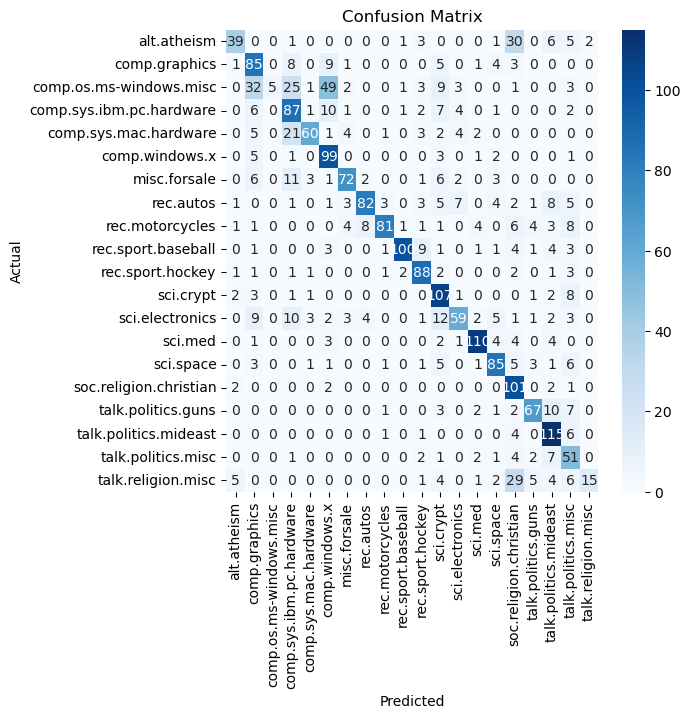

In [28]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


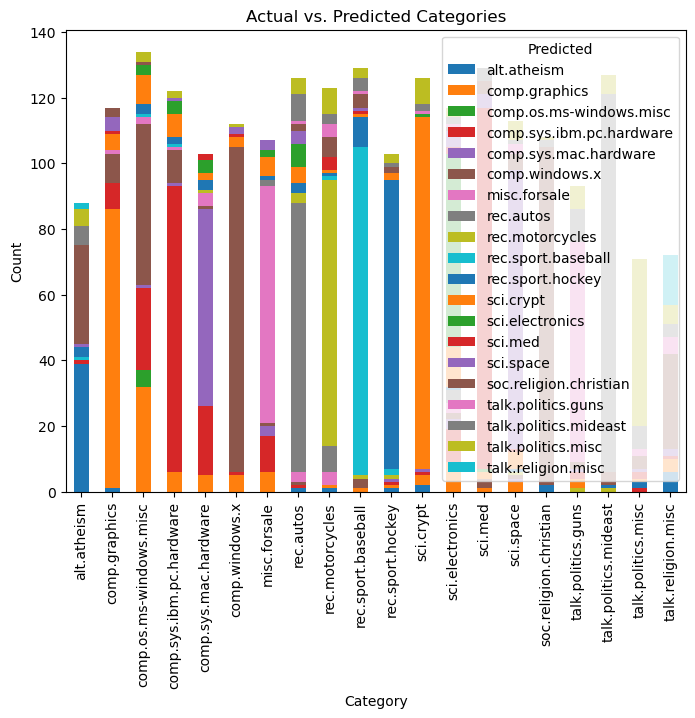

In [29]:

# Bar Chart for Actual vs. Predicted Categories
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
results_count = df_results.value_counts().unstack()
results_count.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Actual vs. Predicted Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [30]:
X_test_vectorized.shape

(2220, 88424)

In [31]:
X_train_vectorized.shape

(8876, 88424)

In [32]:
cvec_mat.shape

(11096, 101322)

In [33]:
# Define the number of topics
num_topics = 20

In [34]:
import scipy
doc_word_matrix = X_test_vectorized

In [37]:
# Hyperparameters
num_documents, num_words = doc_word_matrix.shape
num_topics = 20
alpha = 0.5  # Dirichlet hyperparameter for document-topic distribution
beta = 0.5   # Dirichlet hyperparameter for topic-word distribution
num_iterations = 1

# Initialize variables
doc_topic_counts = np.zeros((num_documents, num_topics)) + alpha
word_topic_counts = np.zeros((num_words, num_topics)) + beta
topic_counts = np.zeros(num_topics) + num_words * beta

# Initialize topic assignments randomly
topic_assignments = np.random.randint(num_topics, size=(num_documents, num_words))

# Collapsed Gibbs Sampling
for iteration in range(num_iterations):
    for doc in range(num_documents):
        for word in range(num_words):
            topic = topic_assignments[doc, word]
            
            # Decrement counts for the current assignment
            doc_topic_counts[doc, topic] -= 1
            word_topic_counts[word, topic] -= 1
            topic_counts[topic] -= 1
            
            # Calculate probabilities with a small constant added to denominators
            p_topic_given_doc = (doc_topic_counts[doc, :] + alpha) / (np.sum(doc_topic_counts[doc, :]) + num_topics * alpha + 1e-10)
            p_word_given_topic = (word_topic_counts[word, :] + beta) / (topic_counts + num_words * beta + 1e-10)
            p_topic = p_topic_given_doc * p_word_given_topic
            p_topic = scipy.special.softmax(p_topic)
            # Sample a new topic
            new_topic = np.random.choice(num_topics, p=p_topic)
            topic_assignments[doc, word] = new_topic
            
            # Increment counts for the new assignment
            doc_topic_counts[doc, new_topic] += 1
            word_topic_counts[word, new_topic] += 1
            topic_counts[new_topic] += 1

# Display the final topic assignments
print("Final Topic Assignments:")
print(topic_assignments)

KeyboardInterrupt: 

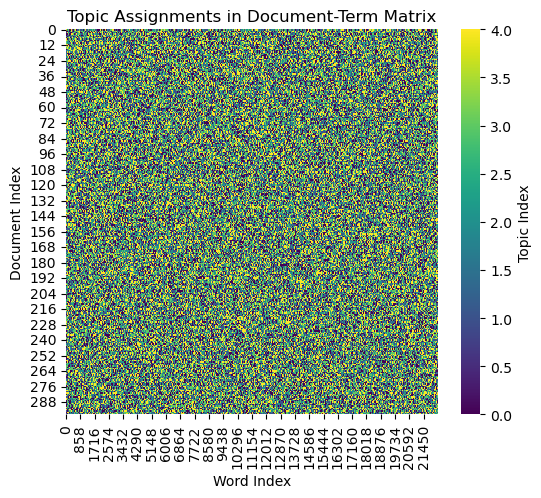

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the final topic assignments using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(topic_assignments, cmap='viridis', cbar_kws={'label': 'Topic Index'})
plt.title('Topic Assignments in Document-Term Matrix')
plt.xlabel('Word Index')
plt.ylabel('Document Index')
plt.show()

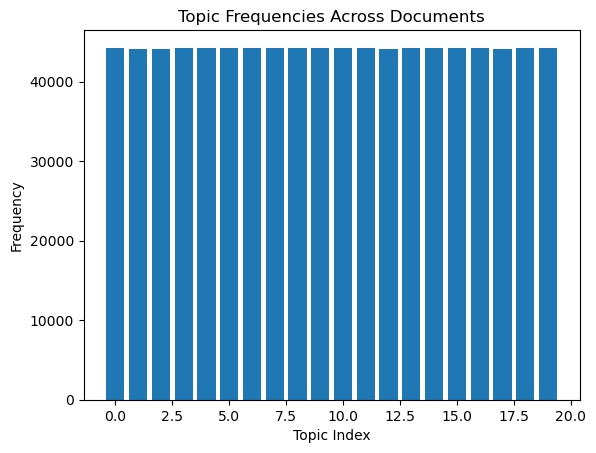

In [38]:
topic_frequencies = np.sum(topic_assignments, axis=0)
plt.bar(range(num_topics), topic_counts)
plt.title('Topic Frequencies Across Documents')
plt.xlabel('Topic Index')
plt.ylabel('Frequency')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


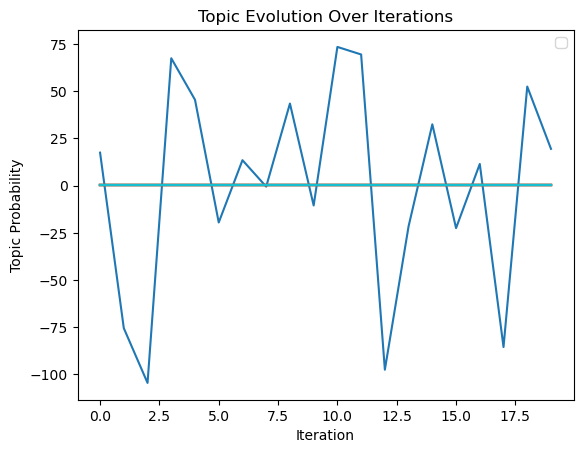

In [46]:
doc_indices_to_plot = [0,1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]  # Adjust as needed
for doc_index in doc_indices_to_plot:
    plt.plot(doc_topic_counts[doc_index, :], label=f'Document {doc_index + 1}')

plt.title('Topic Evolution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Topic Probability')
plt.legend()
plt.show()

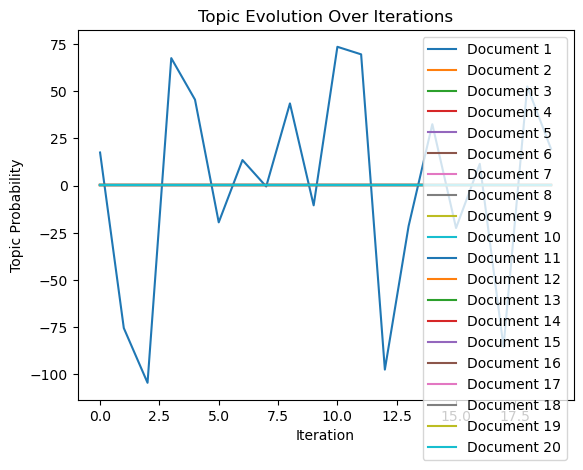

In [47]:
doc_indices_to_plot = [0,1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]  # Adjust as needed
for doc_index in doc_indices_to_plot:
    plt.plot(doc_topic_counts[doc_index, :], label=f'Document {doc_index + 1}')

plt.title('Topic Evolution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Topic Probability')
plt.legend()
plt.show()

In [48]:
X_train_vectorized

<8876x88424 sparse matrix of type '<class 'numpy.int64'>'
	with 609761 stored elements in Compressed Sparse Row format>

In [49]:
from sklearn.linear_model import LogisticRegression

# Assuming lr_model is your trained logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train_vectorized, y_train)

# Make predictions using the logistic regression model
lr_predictions = lr_model.predict(X_test_vectorized)


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
print(lr_model.score(X_train_vectorized, y_train))
print(lr_model.score(X_test_vectorized, y_test))

0.988395673726904
0.7009009009009008


In [51]:
# Generate and print the classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_predictions))

Classification Report for Logistic Regression:
                          precision    recall  f1-score   support

             alt.atheism       0.60      0.58      0.59        88
           comp.graphics       0.62      0.62      0.62       117
 comp.os.ms-windows.misc       0.72      0.64      0.68       134
comp.sys.ibm.pc.hardware       0.64      0.65      0.64       122
   comp.sys.mac.hardware       0.62      0.73      0.67       103
          comp.windows.x       0.71      0.75      0.73       112
            misc.forsale       0.69      0.65      0.67       107
               rec.autos       0.73      0.66      0.69       126
         rec.motorcycles       0.58      0.80      0.67       123
      rec.sport.baseball       0.72      0.80      0.76       129
        rec.sport.hockey       0.81      0.85      0.83       103
               sci.crypt       0.86      0.76      0.81       126
         sci.electronics       0.61      0.65      0.63       117
                 sci.med    

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [53]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

# Assuming X_train_vectorized, y_train, X_test_vectorized, and y_test are already defined

# KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_vectorized, y_train)
knn_predictions = knn_model.predict(X_test_vectorized)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy Score for KNeighborsClassifier: {knn_accuracy}')

#     """
#     # Confusion Matrix for KNeighborsClassifier
#     knn_cm = confusion_matrix(y_test, knn_predictions)
#     plt.figure(figsize=(5, 5))
#     sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
#     plt.title('KNeighbors Classifier Confusion Matrix')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()

#     # Bar Chart for Actual vs. Predicted Categories for KNeighborsClassifier
#     knn_df_results = pd.DataFrame({'Actual': y_test, 'Predicted': knn_predictions})
#     knn_results_count = knn_df_results.value_counts().unstack()
#     knn_results_count.plot(kind='bar', stacked=True, figsize=(5, 5))
#     plt.title('KNeighbors Classifier Actual vs. Predicted Categories')
#     plt.xlabel('Category')
#     plt.ylabel('Count')
#     plt.show()
#     """


Accuracy Score for KNeighborsClassifier: 0.23648648648648649


In [92]:

# RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_vectorized, y_train)
rf_predictions = rf_model.predict(X_test_vectorized)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Accuracy Score for Random Forest Classifier: {rf_accuracy}')

# # Confusion Matrix for RandomForestClassifier
# rf_cm = confusion_matrix(y_test, rf_predictions)
# plt.figure(figsize=(8, 6))
# sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
# plt.title('Random Forest Classifier Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # Bar Chart for Actual vs. Predicted Categories for RandomForestClassifier
# rf_df_results = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})
# rf_results_count = rf_df_results.value_counts().unstack()
# rf_results_count.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('Random Forest Classifier Actual vs. Predicted Categories')
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.show()

Accuracy Score for Random Forest Classifier: 0.9798657718120806


In [55]:

# DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vectorized, y_train)
dt_predictions = dt_model.predict(X_test_vectorized)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f'Accuracy Score for Decion Tree Classifier: {dt_accuracy}')
# # Confusion Matrix for DecisionTreeClassifier
# dt_cm = confusion_matrix(y_test, dt_predictions)
# plt.figure(figsize=(8, 6))
# sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
# plt.title('Decision Tree Classifier Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # Bar Chart for Actual vs. Predicted Categories for DecisionTreeClassifier
# dt_df_results = pd.DataFrame({'Actual': y_test, 'Predicted': dt_predictions})
# dt_results_count = dt_df_results.value_counts().unstack()
# dt_results_count.plot(kind='bar', stacked=True, figsize=(10, 6))
# plt.title('Decision Tree Classifier Actual vs. Predicted Categories')
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.show()


Accuracy Score for Decion Tree Classifier: 0.49099099099099097


In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.datasets import fetch_20newsgroups
from gensim.models import LdaModel
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.coherencemodel import CoherenceModel

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM Classifier
svm_model = SVC(kernel='linear')  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
svm_model.fit(X_train_vectorized, y_train)
svm_predictions = svm_model.predict(X_test_vectorized)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f'Accuracy Score for SVM Classifier: {svm_accuracy}')


Accuracy Score for SVM Classifier: 0.5801801801801801
